# Problem 1

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [15]:
df = pd.read_csv('CH01PR27.txt', sep = '\s+', header = None, names = ['the measure of muscle mass','age'])
df.head()

,the measure of muscle mass,age
0,106,43
1,106,41
2,97,47
3,113,46
4,96,45


## a.

Prepare a histogram for the ages Xi. What information does your plot provide? Is this plot consistent with the random selection of women from each 10-year age group? Explain.

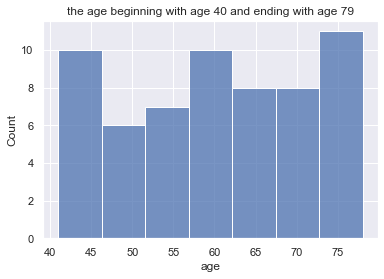

In [23]:
sns.set_theme()
sns.histplot(data=df, x = 'age').set(title='the age beginning with age 40 and ending with age 79');

#### The information the plot provide is a nutritionist randomly selected 15 women from each 10-year age group, beginning with age 40 and ending with age 79. We can noticed that there are a slightly different distribution between these group. However this difference can be accepted and  this plot can be consistent with the random selection of women from each 10-year age group.

## b.

Obtain the residuals 𝑒𝑖 and prepare a normal probability plot of the residuals. Does the distribution of the residuals appear to be symmetrical?


In [24]:
X = df['age']
Y = df['the measure of muscle mass']
X_bar = np.mean(X)
Y_bar = np.mean(Y)
X_err = X - X_bar
Y_err = Y - Y_bar
print(X_bar, Y_bar)
X_err.head()

59.983333333333334 84.96666666666667


0   -16.983333
1   -18.983333
2   -12.983333
3   -13.983333
4   -14.983333
Name: age, dtype: float64

In [25]:
A = np.sum(X_err*Y_err)
B = np.sum(X_err**2)
print(A,'\n',B)

-9771.033333333333 
 8210.983333333335


In [26]:
b1 = A / B
b0 = Y_bar - b1*X_bar
print(b1, b0)

-1.1899955141385823 156.34656425641265


In [27]:
n= len(X)
Y_hat = b0 + b1 * X
resid = Y - Y_hat

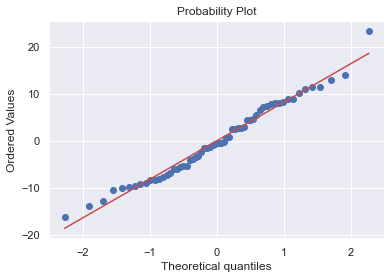

In [34]:
stats.probplot(resid, dist="norm", plot = plt);
plt.show();

#### The distribution of the residuals appear to be symmetrical. However, the distribution in the right top connor and left bottom conner is not symmetrical.

## c. 

Plot the residuals 𝑒𝑖 against Yi_hat and also against Xi on separate graphs to ascertain whether any departures from regression model (2.1) are evident. Do the two plots provide the same information? State your conclusions.

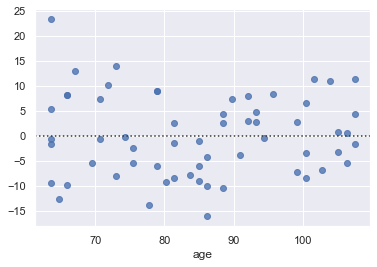

In [40]:
sns.residplot(x=Y_hat,y= resid, data=df);

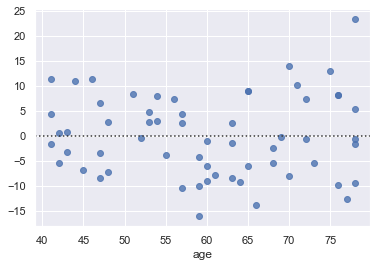

In [41]:
sns.residplot(x=X, y=resid, data=df);

#### The two plots provide the same information. Additionally, there is an outlier in the left top corner in plot 1 and in the right top corner in plot 2

## d.

Assume that (3.10) is applicable and conduct the Breusch-Pagan test to determine whether or not the error variance varies with the level of 𝑋. Use 𝛼 = 0.01. State the alternatives, decision rule, and conclusion. Is your conclusion consistent with your preliminary findings in part (c)?


In [43]:
model = smf.ols('Y ~ X', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           4.12e-19
Time:                        10:21:59   Log-Likelihood:                -210.17
No. Observations:                  60   AIC:                             424.3
Df Residuals:                      58   BIC:                             428.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    156.3466      5.512     28.363      0.000     145.313     167.381
X             -1.1900      0.090    -13.193      0.000      -1.371      -1.009
==============================================================================
Omnibus:                        1.213   Durbin-Watson:                   2.416
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                1.208
Skew:                           0.319   Prob(JB):                        0.547
Kurtosis:                       2.726   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The alternative conclusions are:

H0 : γ1 == 0

Ha : γ1 != 0

#### The decision rule is:

If X^2 <= X^2_BP, conclude H0

If X^2 >= X^2_BP, conclude Ha

In [46]:
alpha = 0.01
resid_square = resid**2
model_1 = smf.ols('resid_square ~ X', data=df)
results_1 = model_1.fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resid_square   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     4.615
Date:                Sat, 15 Oct 2022   Prob (F-statistic):             0.0359
Time:                        10:29:57   Log-Likelihood:                -349.29
No. Observations:                  60   AIC:                             702.6
Df Residuals:                      58   BIC:                             706.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -53.5326     56.015     -0.956      0.343    -165.659      58.593
X              1.9690      0.917      2.148      0.036       0.134       3.804
==============================================================================
Omnibus:                       66.573   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.395
Skew:                           3.051   Prob(JB):                    1.36e-119
Kurtosis:                      16.481   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
SSR_star= sum((results_1.fittedvalues - np.mean(resid_square))**2)
SSR_star

31833.428951644546

In [51]:
X2_BP = (SSR_star/2) / ((SSE/n)**2)
X2_BP

3.817124858502205

In [82]:
X2 = stats.chi2.ppf(q=1-0.01,df=1)
p =1- stats.chi2.cdf(x=3.817,df=1)
print(X2,p)

6.6348966010212145 0.05073500104800588


#### Conclusion: to control the alpha risk at 0.01, we require X^2(0.99;1) = 6.6. Since X^2_BP= 3.817 <= 6.63, we conclude H0, that the error variance is constant.

# Problem 2:


In [102]:
df1 = pd.read_csv('CH03PR18.txt', sep = '\s+', header =None, names=['hours','lot size'])
df1.head()
x= df1['lot size']
y= df1['hours']
x_new = np.sqrt(x)

## a.

In [1]:
sns.scatterplot(x='lot size', y='hours', data=df1, color = 'black');

NameError: name 'sns' is not defined

- A linear relation does not appear to be adequate here. 

- The regression relation in the scatter-plot appears to be curvilinear here. 

- The variability across different X levels appears to be fairly constant, thus a transformation to X is more appropriate here.

## b.

In [104]:
model = smf.ols('y ~ x_new', data=df1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     365.7
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           1.29e-36
Time:                        11:56:43   Log-Likelihood:                -232.88
No. Observations:                 111   AIC:                             469.8
Df Residuals:                     109   BIC:                             475.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2547      0.639      1.964      0.052      -0.012       2.521
x_new          3.6235      0.189     19.124      0.000       3.248       3.999
==============================================================================
Omnibus:                        1.123   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                1.160
Skew:                          -0.151   Prob(JB):                        0.560
Kurtosis:                       2.600   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The estimated linear regression function for the transformed data is slightly higher than it original.

## c.

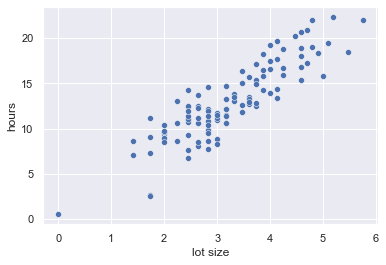

In [105]:
sns.scatterplot(x=x_new, y= y, data =df1);

#### Conclusion:

The scatter-plot shows a reasonably linear relation, the estimated regression line appears to be a good fit to the transformed data.

## d.

11.36936936936937 12.926486486486487
2608.7040540540543 
 4891.855855855856
0.5332749228355274 6.863486913347429


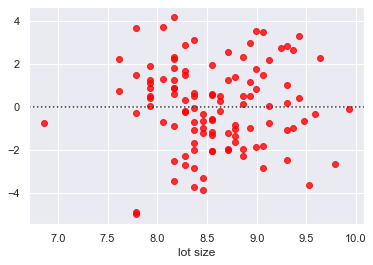

In [109]:
d. Obtain the residuals and plot them against the fitted values. Also prepare a normal
probability plot. What do your plots show?


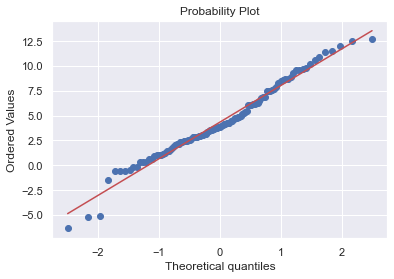

In [110]:
stats.probplot(resid1, dist="norm", plot = plt);
plt.show();

#### Conclusion

The normal probability plot shows that points fall reasonably close to a straight line, with very small tails deviating from the line, suggesting that the distribution of the error terms is approximately normal. These two plots above show a good fit between model and data points. Q - Q plot show the distribution of the residuals appear to be symmetrical.

## e.

### Y = 6.863486913347429 + 0.5333 X